In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy.stats import norm

In [2]:
df = pd.read_csv('data.csv')
df.head(5)

,SampleTime,SensorID,Value
0,0,2,0.033883
1,0,4,-0.009496
2,0,5,0.000000
3,0,7,-0.057306
4,0,8,0.029096


count    4.496620e+06
mean     7.463843e-04
std      2.288528e-02
min     -7.197240e-01
25%     -7.435000e-03
50%      2.900000e-04
75%      8.535000e-03
max      3.012097e+00
Name: Value, dtype: float64


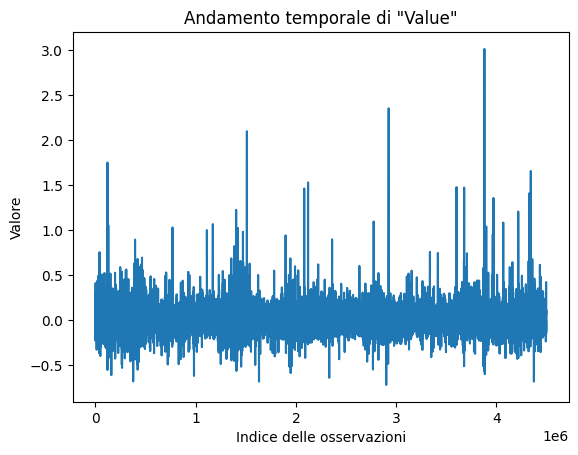

Anomalie rilevate:
         SampleTime  SensorID     Value
3                 0         7 -0.057306
20                0        37  0.106139
48                0        92  0.070400
57                0       108 -0.060000
62                0       125 -0.044774
...             ...       ...       ...
4496371        5966       748  0.113058
4496420        5966       798 -0.093470
4496444        5966       822 -0.046229
4496494        5966       872  0.044439
4496619        5966       998  0.069343

[224602 rows x 3 columns]


In [3]:
# 1. Esegui una rapida esplorazione del tuo dataset
print(df['Value'].describe())

# 2. Visualizza l'andamento temporale della colonna "Value"
plt.plot(df['Value'])
plt.xlabel('Indice delle osservazioni')
plt.ylabel('Valore')
plt.title('Andamento temporale di "Value"')
plt.show()

# 3. Calcolo delle statistiche di base
mean_baseline = df['Value'].mean()
std_baseline = df['Value'].std()

# 4. Rilevamento delle anomalie con Isolation Forest
X = df['Value'].values.reshape(-1, 1)
clf = IsolationForest(contamination=0.05)  # Modifica la contaminazione in base alle tue esigenze
clf.fit(X)

# Identificazione delle anomalie
predictions = clf.predict(X)
anomalies = df[predictions == -1]

print("Anomalie rilevate:")
print(anomalies)

In [4]:
# Definisci la funzione per generare dati con cambiamenti nei valori al tempo tau
def generate_data_with_change(tau):
    # Dati prima di tau
    data_before_tau = np.random.normal(loc=0, scale=1, size=tau)
    # Dati dopo tau
    data_after_tau = np.random.normal(loc=5, scale=1, size=1000 - tau)
    # Concatena i dati prima e dopo tau
    data = np.concatenate([data_before_tau, data_after_tau])
    return data

# Tempo in cui avviene il cambio nelle proprietà statistiche
tau = 500

# Genera dati con cambiamenti nelle proprietà statistiche al tempo tau
data = generate_data_with_change(tau)

# Addestra il modello Isolation Forest su dati prima di tau
X_before_tau = data[:tau].reshape(-1, 1)
clf_before_tau = IsolationForest(contamination=0.05)
clf_before_tau.fit(X_before_tau)

# Addestra il modello Isolation Forest su dati dopo tau
X_after_tau = data[tau:].reshape(-1, 1)
clf_after_tau = IsolationForest(contamination=0.05)
clf_after_tau.fit(X_after_tau)

# Valuta il modello su tutti i dati
predictions_before_tau = clf_before_tau.predict(data.reshape(-1, 1))
predictions_after_tau = clf_after_tau.predict(data.reshape(-1, 1))

# Identifica le anomalie prima e dopo tau
anomalies_before_tau = data[predictions_before_tau == -1]
anomalies_after_tau = data[predictions_after_tau == -1]

print("Anomalie rilevate prima di tau:")
print(anomalies_before_tau)

print("\nAnomalie rilevate dopo tau:")
print(anomalies_after_tau)

Anomalie rilevate prima di tau:
[ 3.26677653  2.18187446 -2.27647632  2.19470776 -1.9988789   2.04391578
 -2.04273878 -2.35756257 -2.40128233 -2.36891552  3.05051143 -2.15545828
  2.09072628  2.13836573  3.66742391  2.1264794  -2.17570424 -2.1854415
 -2.11260444  2.33116419  2.25058024 -2.14740223  2.16464336 -2.06315189
 -2.0601195   5.09624004  4.72266048  4.04764092  4.12595112  5.70068848
  4.65070802  4.63128531  6.22875123  5.17770423  5.44280504  6.34067669
  3.8054557   5.09885933  3.97752219  2.91035403  6.06196963  5.3382873
  7.36022753  5.84067644  5.84037826  4.20019193  5.48445161  5.26411648
  3.92860907  4.12683656  5.96033482  5.08367383  2.81665272  3.68449643
  3.84522098  6.39152568  3.73042823  6.35715145  4.89545819  4.2039475
  6.0544146   2.59039509  4.96747506  5.08300322  6.17931687  5.46320811
  5.24010189  4.33888144  6.76375257  3.70984925  5.5459975   4.83952267
  5.19243499  4.55794163  2.96067702  2.67603585  5.32450586  2.9028011
  5.27756955  5.2436694

In [5]:
# Estrai un set di statistiche di riepilogo nominali da X
# Supponiamo che mean_baseline e std_baseline siano le statistiche di riepilogo estratte in precedenza

# Calcola la cdf nominale empirica
nominal_cdf = norm.cdf(data, loc=mean_baseline, scale=std_baseline)

# Calcola il p-value per ogni punto dati xt
p_values = 1 - nominal_cdf

# Definisci il livello di significatività alpha
alpha = 0.05

# Calcola lo score st per ogni punto dati xt
scores = np.log(alpha / p_values)

# Identifica gli outlier in base al valore di st rispetto al livello di significatività alpha
outliers = data[scores > 0]

print("Punti dati outlier:")
print(outliers)

Punti dati outlier:
[0.39777794 0.80751466 0.51239175 0.79616739 1.35413912 0.19903996
 0.97027638 1.74962171 0.24916249 0.50606791 0.2097683  3.26677653
 0.13684595 1.34377701 0.77374928 0.21296043 0.13483201 0.2611881
 0.41825268 2.18187446 0.144616   1.07679958 0.44383425 1.11905379
 1.22006956 0.74881196 0.88206647 0.49221206 1.16196554 1.4284027
 0.22847558 0.55195211 0.09314713 1.53469468 1.97957285 1.16246934
 0.17520982 0.3633616  0.83336083 0.9346426  2.19064283 2.00650172
 0.9577084  0.96846615 0.10376318 0.50812538 0.88258281 0.32743566
 1.36175478 0.89685471 2.19470776 0.24157775 1.81375525 1.4199223
 0.26545457 1.01581328 0.04591655 0.87398509 1.18437175 1.54321676
 0.9590758  0.47893981 0.83534167 0.74781764 0.34334239 0.37244066
 0.1646098  0.96874428 0.70502558 0.65125447 0.82518146 0.2990942
 2.04391578 1.01810439 0.49174076 0.51941768 0.08641569 0.44789343
 0.63593374 0.92002681 0.33614704 1.22191363 0.17305624 1.66187515
 1.7061158  0.08055274 1.94732673 1.30900889 0

/var/folders/fp/rjg9p1053dqgy20clcw0tk300000gn/T/ipykernel_54388/3251409746.py:14: RuntimeWarning: divide by zero encountered in divide
  scores = np.log(alpha / p_values)
